In this code, I'll be creating a polynomial model similar to the linear regression model

In [1]:
#Import the neccessaries libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import yfinance as yahoofinance

In [158]:
#Input a stock to retrieve historical data
asset = input()
data = yahoofinance.download(asset)
ticker = yahoofinance.Ticker(asset)
data = ticker.history(period="1y")

WMT
[*********************100%%**********************]  1 of 1 completed


In [159]:
data = data.reset_index()

In [160]:
close = data.Close

In [161]:
#Getting the index range to use in the polynomial model
data_range = []
for i in range(len(close)):
    data_range.append(i)

In [162]:
data_range = pd.DataFrame(data_range)

In [163]:
x = data_range.values
y = close.values

In [164]:
#Using a higher degree to accurately predict the data
x = x.reshape(-1,1)
poly = PolynomialFeatures(degree=4)

In [165]:
x_poly = poly.fit_transform(x)

In [166]:
poly.fit(x_poly,y)

PolynomialFeatures(degree=4)

In [167]:
linear = LinearRegression()

In [168]:
linear.fit(x_poly,y)

LinearRegression()

In [169]:
y_predict = linear.predict(x_poly)

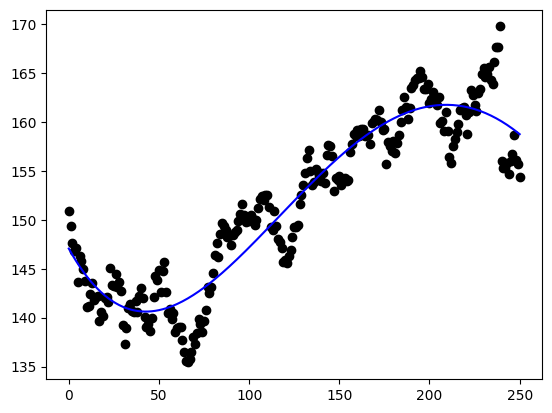

In [170]:
#Plotting the scatter plots and the polynomial regression model
plt.scatter(x,y, color="black")
plt.plot(x, y_predict, color="blue")

In [171]:
#The correlation of determination to see how accurate the model is
r_squared = r2_score(y,y_predict)
print("r_squared valued: " ,r_squared)

r_squared valued:  0.8866488425473418


In [172]:
absolute_error = y_predict - y

In [173]:
table = pd.Series(absolute_error)
spread = pd.DataFrame(table)

In [174]:
spread

,0
0,-3.842501
1,-2.625042
2,-1.210424
3,-0.751163
4,-1.277725
...,...
246,2.559692
247,0.553644
248,2.973868
249,3.220375


In [175]:
#Turning the absolute value into a zcore to create a 2 standard deviation range
mean = spread.mean()
stdev = spread.std()
zscore = (spread - mean) / stdev

In [176]:
price_mean = data.Close.mean()
price_stdev = data.Close.std()
price_zscore = (data.Close - price_mean) / price_stdev

Text(0.5, 1.0, 'Spread')

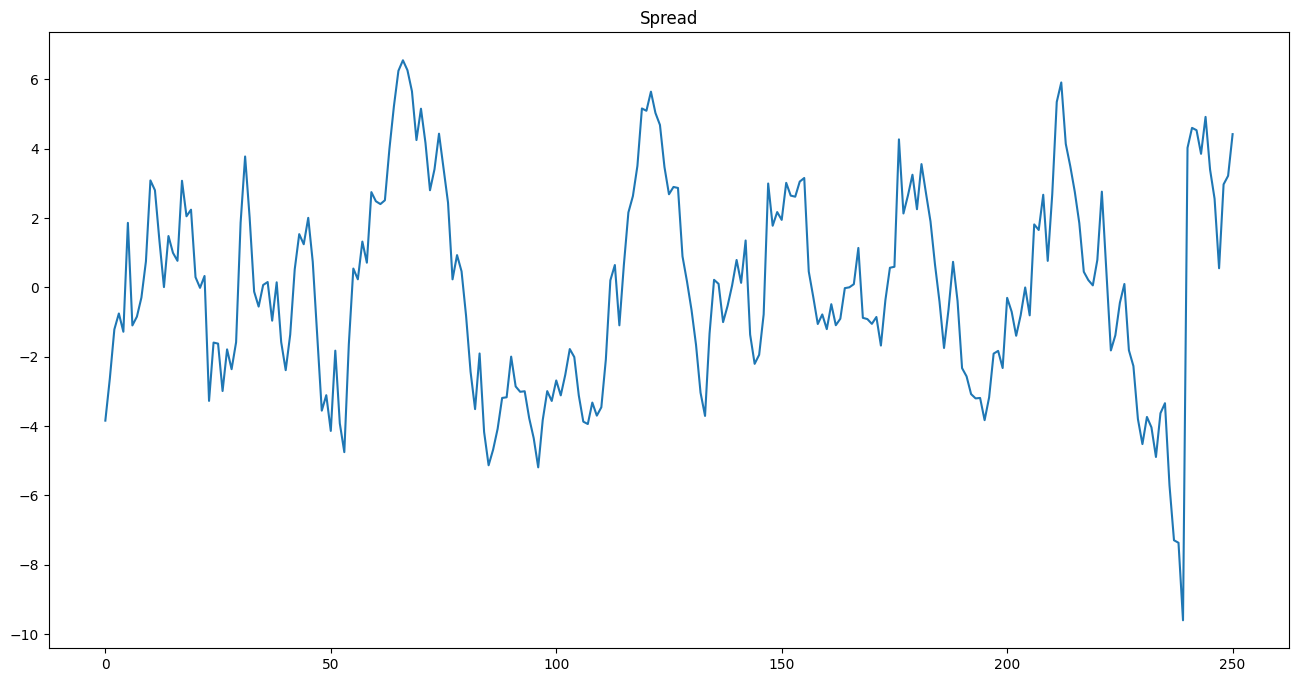

In [177]:
plt.figure(figsize=(16,8))
plt.plot(spread)
plt.title("Spread")

Text(0.5, 1.0, 'Zscore')

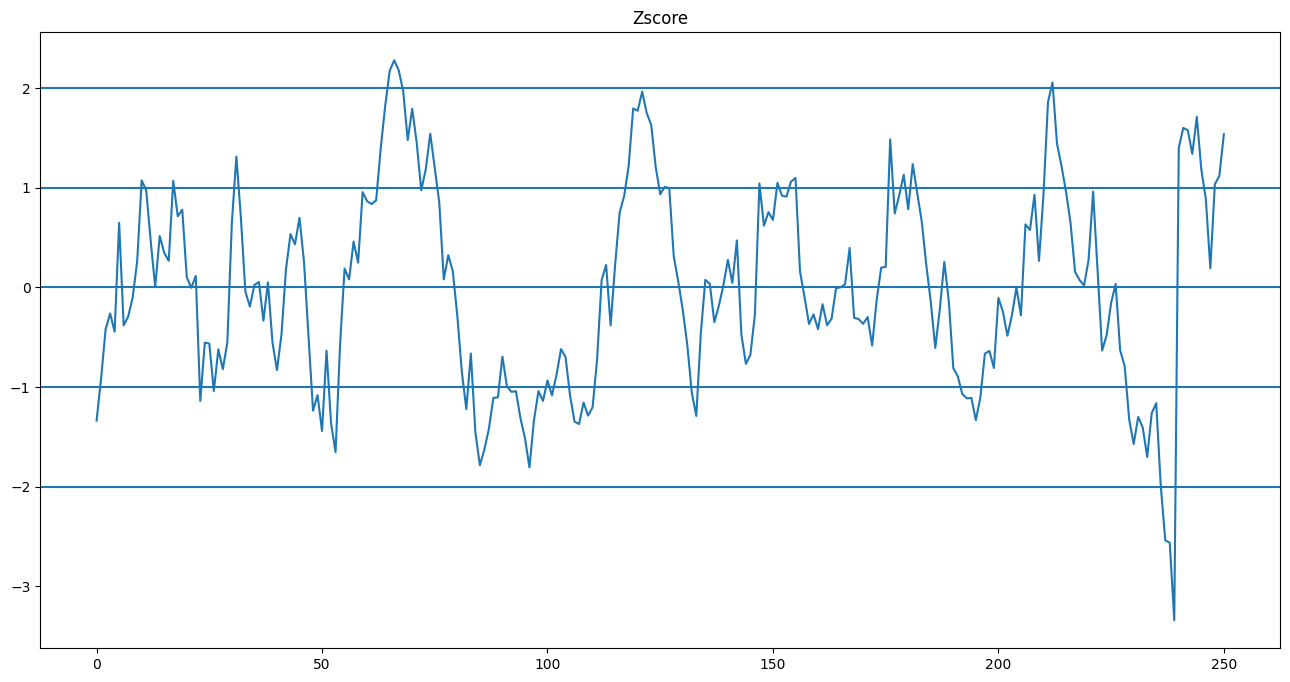

In [178]:
plt.figure(figsize=(16,8))
plt.plot(zscore)
plt.axhline(2)
plt.axhline(1)
plt.axhline(0)
plt.axhline(-1)
plt.axhline(-2)
plt.title("Zscore")

In [179]:
#Adding and subtracting the zscore the predicted v
two_zscore = (1*stdev.sum())+mean.sum()
two_zscore

2.8718097630860426

In [180]:
upper_band = y_predict + two_zscore
lower_band = y_predict - two_zscore

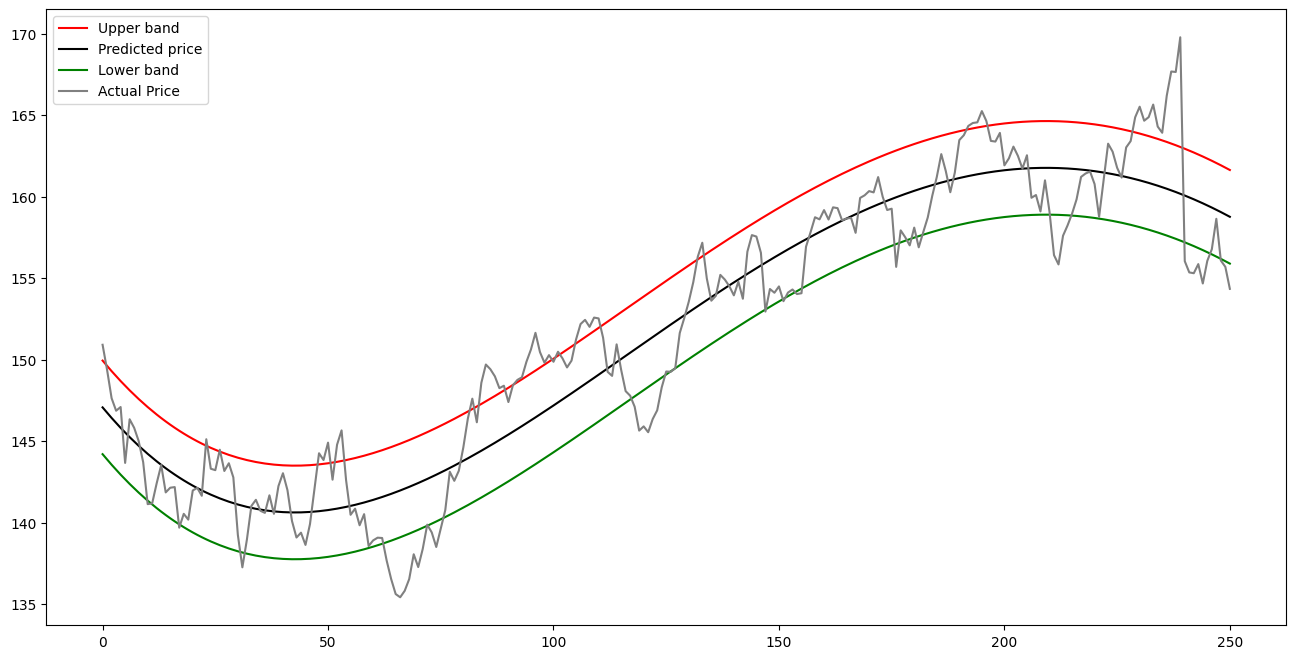

In [181]:
plt.figure(figsize=(16,8))
plt.plot(upper_band, color="red", label="Upper band")
plt.plot(y_predict, color="black", label="Predicted price")
plt.plot(lower_band, "green", label="Lower band")
plt.plot(data.Close, color="gray", label="Actual Price")
plt.legend()